**Benkmura**

Downloading...
From (original): https://drive.google.com/uc?id=1-T03WyHnwMoqiG_3oJsOjW-ED9foJpFf
From (redirected): https://drive.google.com/uc?id=1-T03WyHnwMoqiG_3oJsOjW-ED9foJpFf&confirm=t&uuid=f98d2199-1a85-4b9a-b5da-6c3cca18fa84
To: /content/benkmura_cleaned.tif
100%|██████████| 403M/403M [00:02<00:00, 151MB/s]


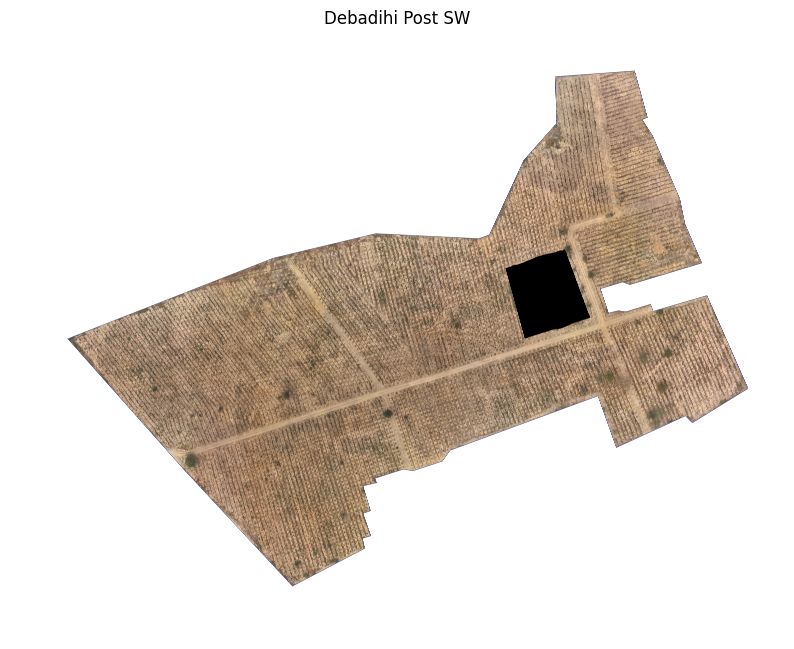

In [ ]:
import gdown
import cv2
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal

file_url = "https://drive.google.com/uc?id=1-T03WyHnwMoqiG_3oJsOjW-ED9foJpFf"
output_file = "benkmura_cleaned.tif"
gdown.download(file_url, output_file, quiet=False)

dataset = gdal.Open(output_file)
image = dataset.ReadAsArray().transpose(1, 2, 0)

if image.dtype != np.uint8:
    image = ((image - np.min(image)) / (np.max(image) - np.min(image)) * 255).astype(np.uint8)

hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

lower_blue = np.array([100, 150, 50])
upper_blue = np.array([140, 255, 255])

blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

contours, _ = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

combined_mask = np.zeros_like(blue_mask)
for contour in contours:
    cv2.drawContours(combined_mask, [contour], -1, 255, thickness=cv2.FILLED)


masked_image = cv2.bitwise_and(image, image, mask=combined_mask)

masked_image = masked_image.astype(np.uint8)

output_tif = "/content/benkmura_cropped.tif"
driver = gdal.GetDriverByName('GTiff')
out_dataset = driver.Create(output_tif, masked_image.shape[1], masked_image.shape[0], 3, gdal.GDT_Byte)

for i in range(3):
    out_dataset.GetRasterBand(i + 1).WriteArray(masked_image[:, :, i])

out_dataset.FlushCache()
out_dataset = None

plt.figure(figsize=(10, 10))
plt.imshow(masked_image)
plt.title("Debadihi Post SW")
plt.axis('off')
plt.show()

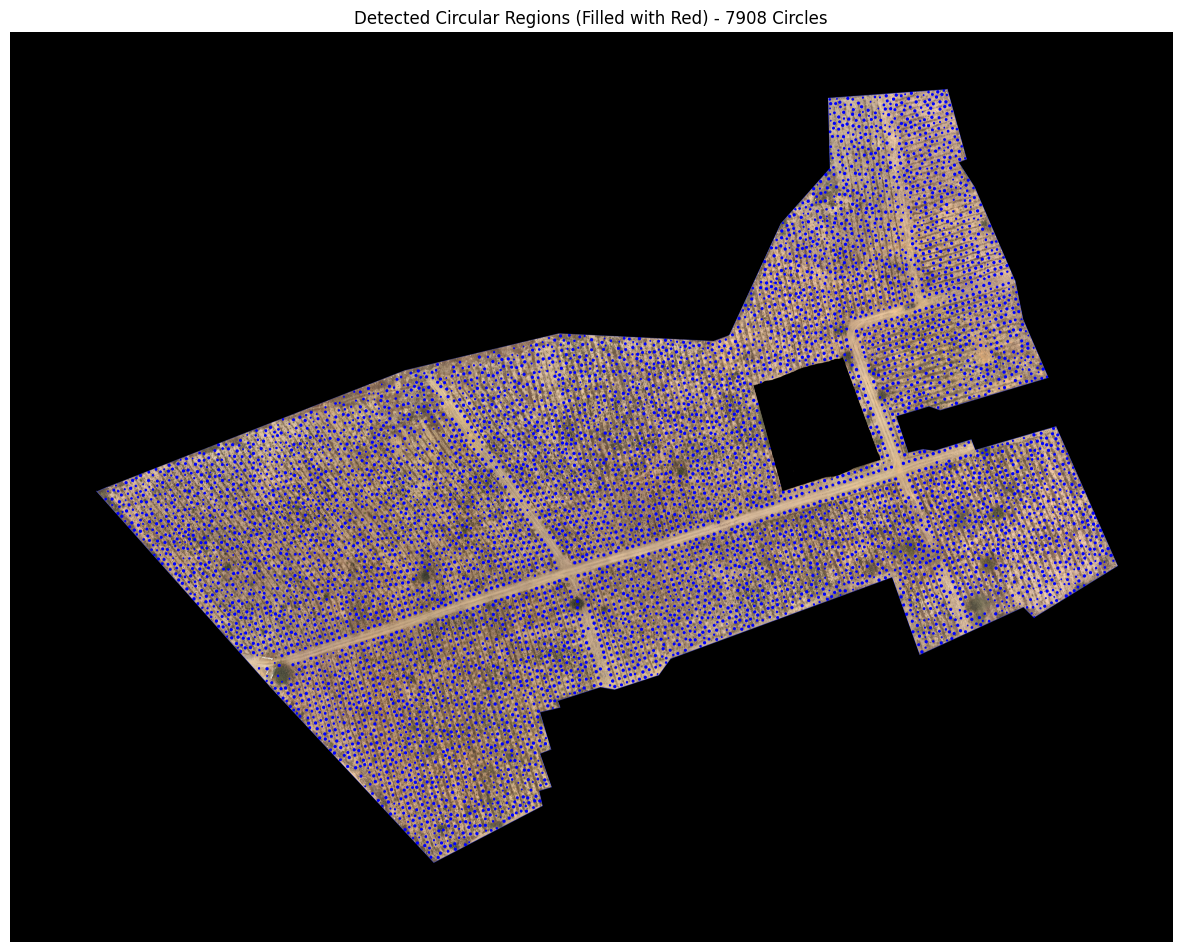

Number of circles detected: 7908


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal

image_path = "/content/benkmura_cropped.tif"

dataset = gdal.Open(image_path)
image = dataset.ReadAsArray().transpose(1, 2, 0)

if image is None:
    raise ValueError(f"Image not found at path: {image_path}")

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

blurred_image = cv2.GaussianBlur(gray_image, (9, 9), 2)

circles = cv2.HoughCircles(
    blurred_image,
    cv2.HOUGH_GRADIENT,
    dp=0.1,
    minDist=75,
    param1=26,
    param2=17,
    minRadius=15,
    maxRadius=30
)

output_image = image.copy()
num_circles = 0
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        center = (circle[0], circle[1])
        radius = circle[2]

        cv2.circle(output_image, center, radius, (0, 0, 255), -1)
        num_circles += 1

plt.figure(figsize=(15, 15))
plt.imshow(output_image)
plt.title(f"Detected Circular Regions (Filled with Red) - {num_circles} Circles")
plt.axis('off')
plt.show()

print(f"Number of circles detected: {num_circles}")

Total Circles: 7908
Red Circles: 69
Blue Circles: 7839


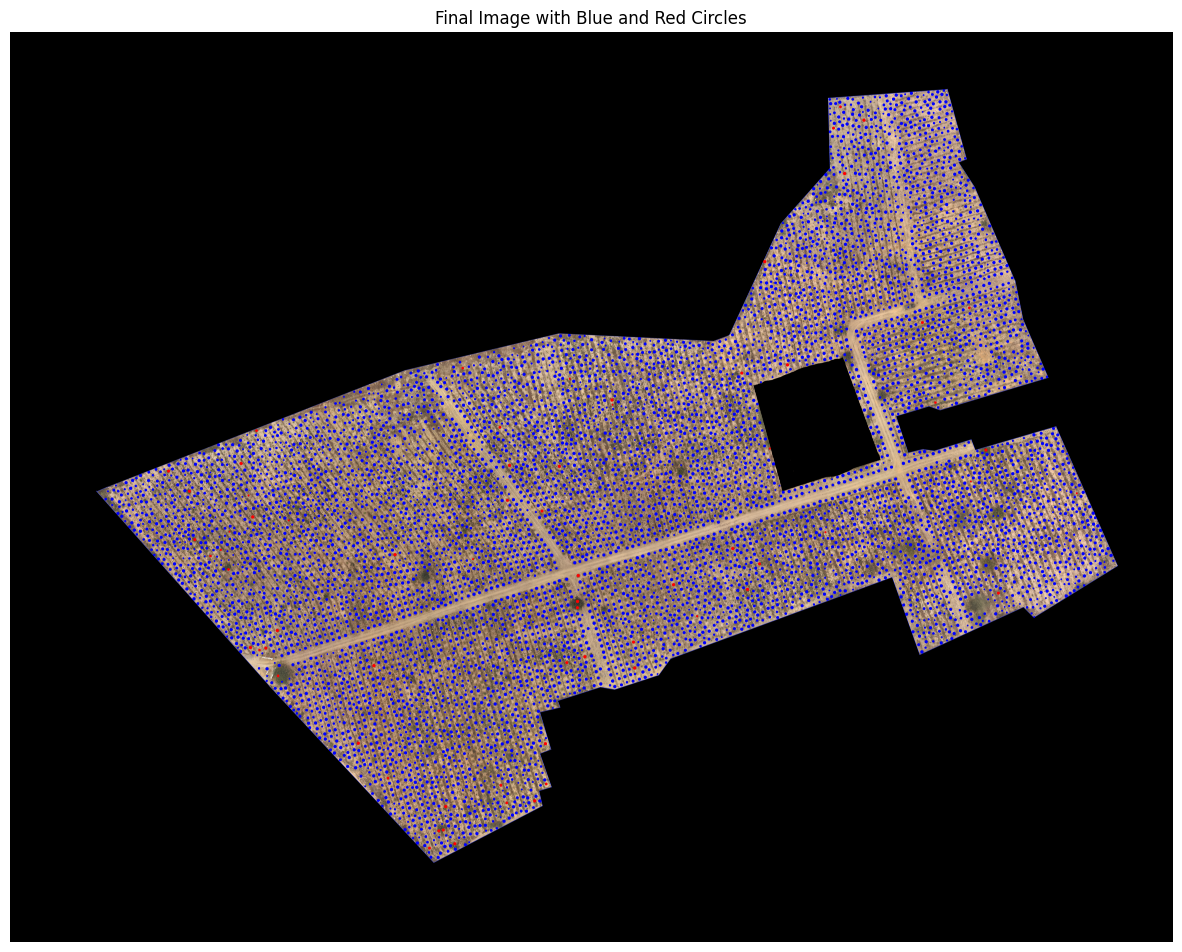

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

lower_green = np.array([34, 40, 40])
upper_green = np.array([90, 255, 255])

green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

total_circles = 0
red_circles = 0
blue_circles = 0

for circle in circles[0, :]:
    center = (circle[0], circle[1])
    radius = circle[2]

    x_min = max(0, center[0] - radius)
    x_max = min(image.shape[1], center[0] + radius)
    y_min = max(0, center[1] - radius)
    y_max = min(image.shape[0], center[1] + radius)

    cropped_mask = green_mask[y_min:y_max, x_min:x_max]
    circular_mask = np.zeros_like(cropped_mask, dtype=np.uint8)
    cv2.circle(circular_mask, (radius, radius), radius, 255, -1)

    green_pixels = cv2.bitwise_and(cropped_mask, circular_mask)
    total_circles += 1
    if cv2.countNonZero(green_pixels) > 0:
        cv2.circle(output_image, center, radius, (255, 0, 0), -1)
        red_circles += 1
    else:

        cv2.circle(output_image, center, radius, (0, 0, 255), -1)
        blue_circles += 1

print(f"Total Circles: {total_circles}")
print(f"Red Circles: {red_circles}")
print(f"Blue Circles: {blue_circles}")

plt.figure(figsize=(15, 15))
plt.imshow(output_image)
plt.title("Final Image with Blue and Red Circles")
plt.axis('off')
plt.show()

**Debadihi**

Downloading...
From (original): https://drive.google.com/uc?id=113S_tVV4jBfPBi7BZOumxbOQ8bvItF9_
From (redirected): https://drive.google.com/uc?id=113S_tVV4jBfPBi7BZOumxbOQ8bvItF9_&confirm=t&uuid=78f51c94-37a2-45af-b412-7cf4a80bce51
To: /content/debadihi_cleaned.tif
100%|██████████| 760M/760M [00:07<00:00, 97.1MB/s]


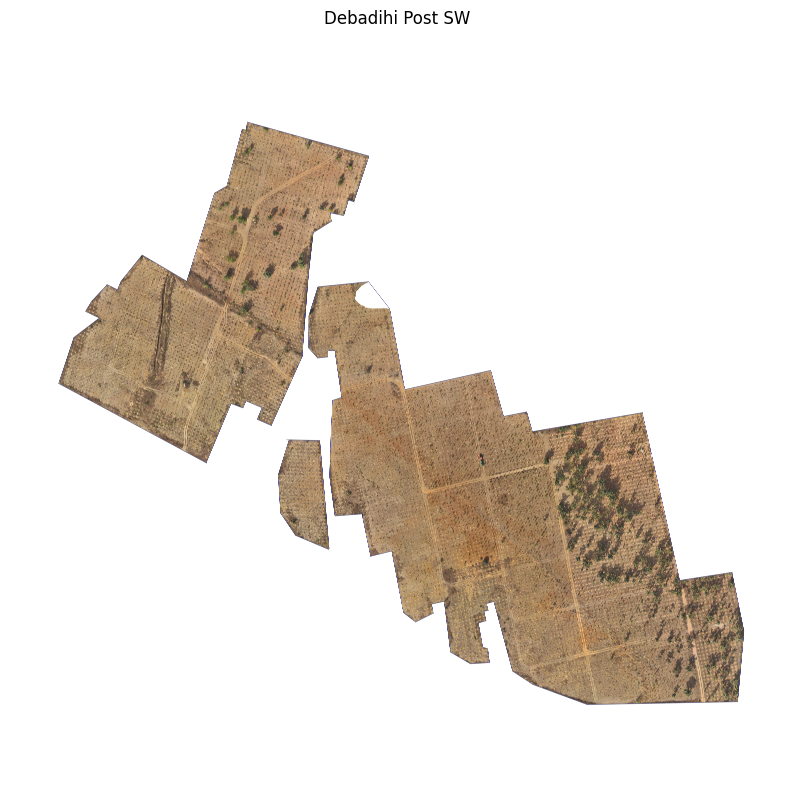

In [ ]:
import gdown
import cv2
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal

file_url = "https://drive.google.com/uc?id=113S_tVV4jBfPBi7BZOumxbOQ8bvItF9_"
output_file = "debadihi_cleaned.tif"
gdown.download(file_url, output_file, quiet=False)
dataset = gdal.Open(output_file)
image = dataset.ReadAsArray().transpose(1, 2, 0)

if image.dtype != np.uint8:
    image = ((image - np.min(image)) / (np.max(image) - np.min(image)) * 255).astype(np.uint8)


hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

lower_blue = np.array([100, 150, 50])
upper_blue = np.array([140, 255, 255])

blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

contours, _ = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

combined_mask = np.zeros_like(blue_mask)
for contour in contours:
    cv2.drawContours(combined_mask, [contour], -1, 255, thickness=cv2.FILLED)

masked_image = cv2.bitwise_and(image, image, mask=combined_mask)

masked_image = masked_image.astype(np.uint8)

output_tif = "/content/debadihi_cropped.tif"
driver = gdal.GetDriverByName('GTiff')
out_dataset = driver.Create(output_tif, masked_image.shape[1], masked_image.shape[0], 3, gdal.GDT_Byte)

for i in range(3):
    out_dataset.GetRasterBand(i + 1).WriteArray(masked_image[:, :, i])

out_dataset.FlushCache()
out_dataset = None

plt.figure(figsize=(10, 10))
plt.imshow(masked_image)
plt.title("Debadihi Post SW")
plt.axis('off')
plt.show()

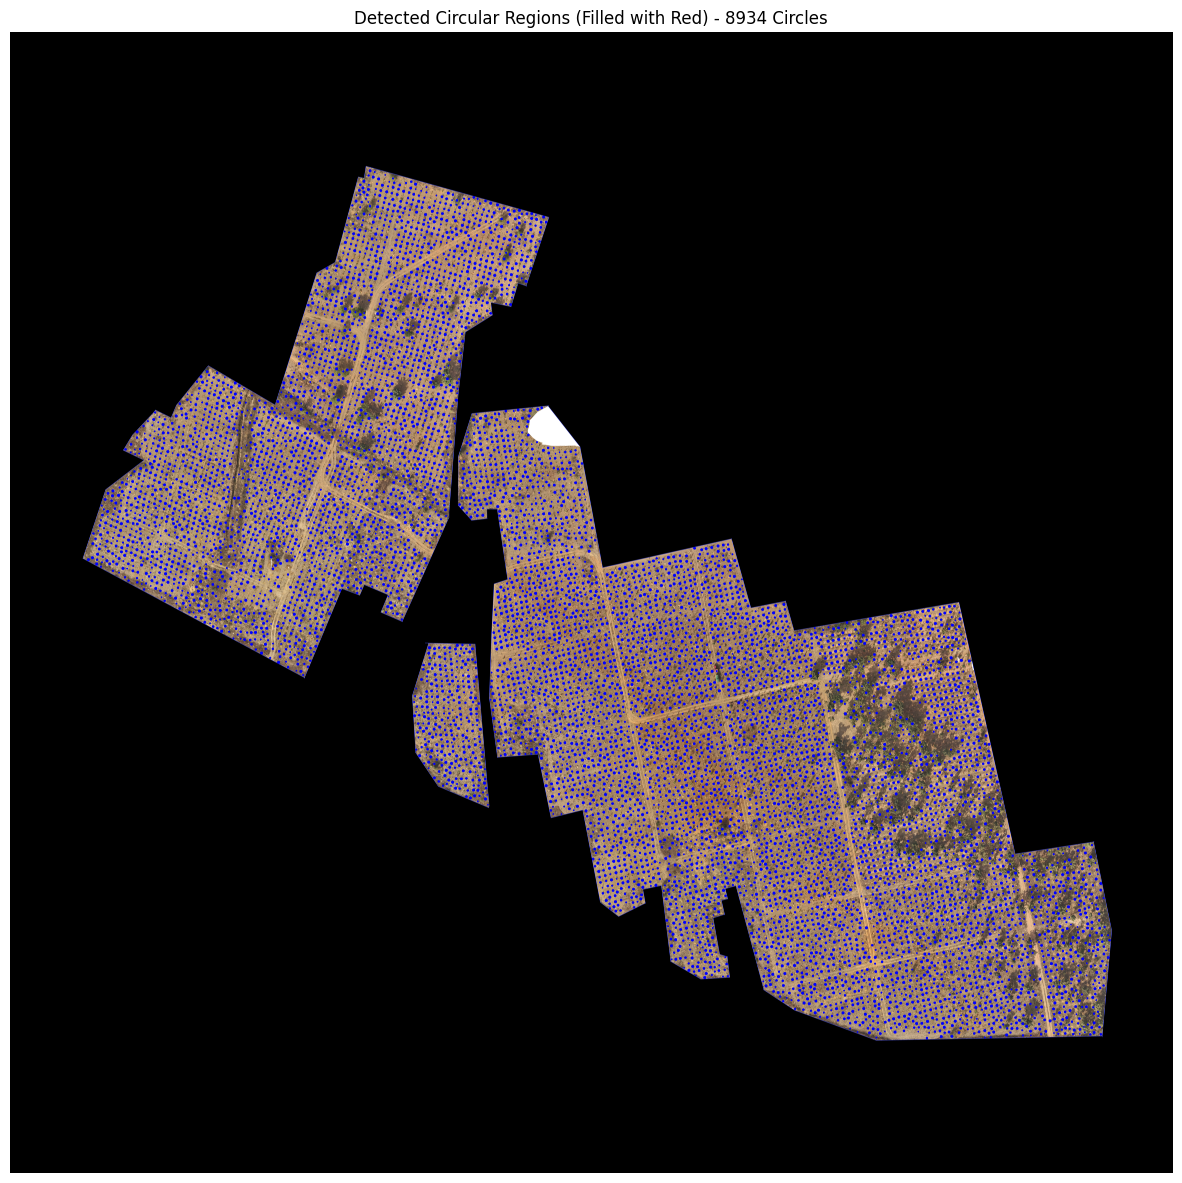

Number of circles detected: 8934


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal

image_path = "/content/debadihi_cropped.tif"

dataset = gdal.Open(image_path)
image = dataset.ReadAsArray().transpose(1, 2, 0)

if image is None:
    raise ValueError(f"Image not found at path: {image_path}")

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

blurred_image = cv2.GaussianBlur(gray_image, (9, 9), 2)

circles = cv2.HoughCircles(
    blurred_image,
    cv2.HOUGH_GRADIENT,
    dp=0.1,
    minDist=75,
    param1=30,
    param2=19,
    minRadius=15,
    maxRadius=30
)

output_image = image.copy()
num_circles = 0
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        center = (circle[0], circle[1])
        radius = circle[2]

        cv2.circle(output_image, center, radius, (0, 0, 255), -1)
        num_circles += 1

plt.figure(figsize=(15, 15))
plt.imshow(output_image)
plt.title(f"Detected Circular Regions (Filled with Red) - {num_circles} Circles")
plt.axis('off')
plt.show()

print(f"Number of circles detected: {num_circles}")

Total Circles: 8934
Red Circles: 133
Blue Circles: 8801


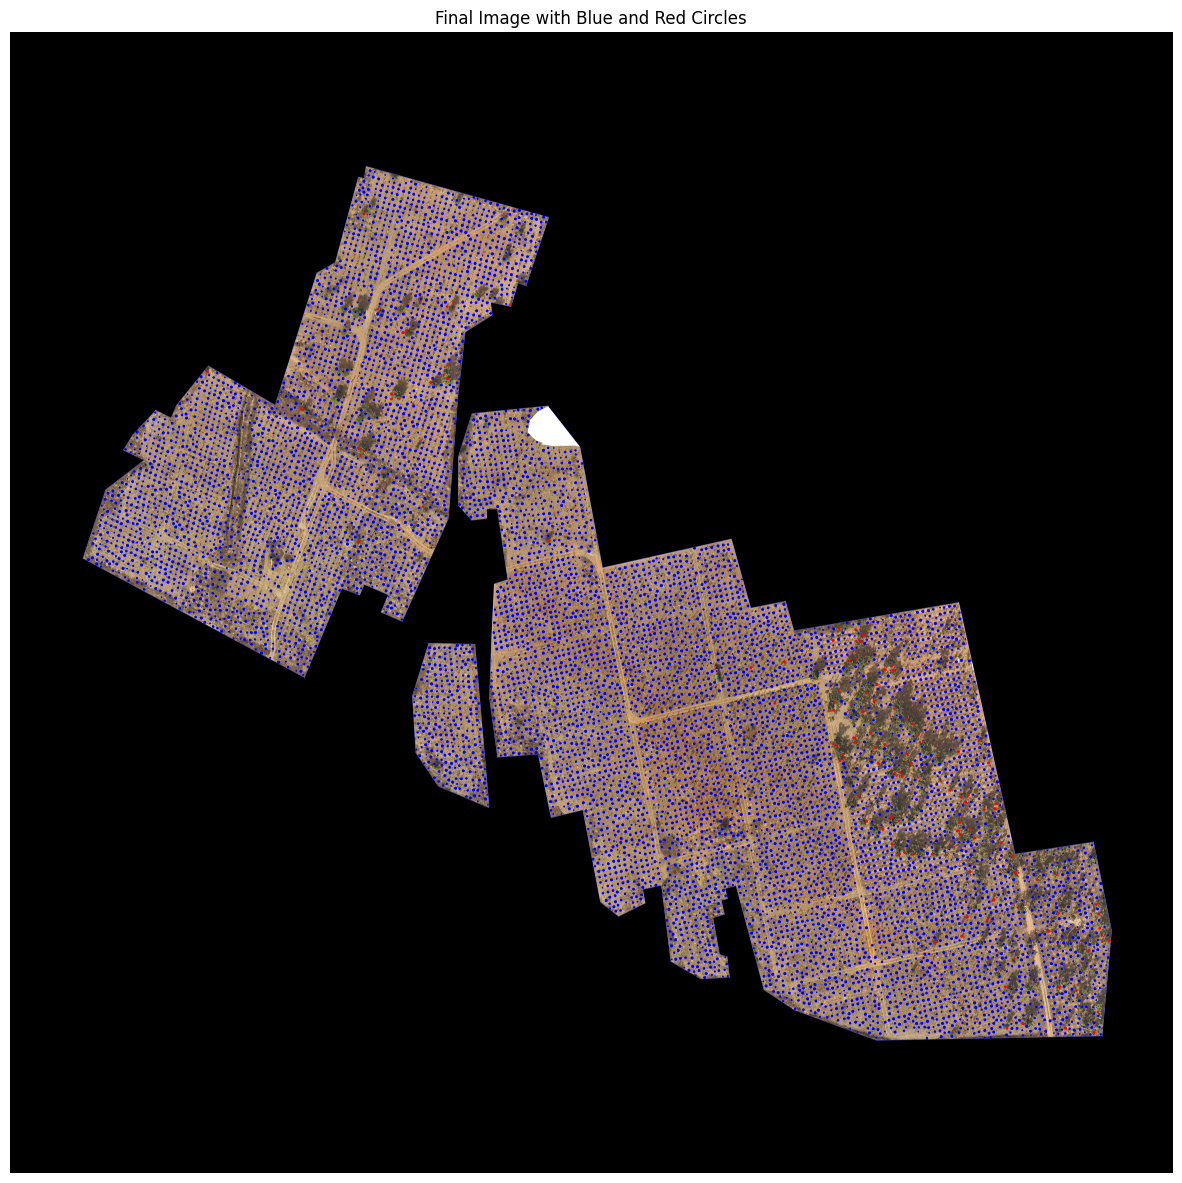

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

lower_green = np.array([50, 40, 40])
upper_green = np.array([70, 255, 255])

green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

total_circles = 0
red_circles = 0
blue_circles = 0

for circle in circles[0, :]:
    center = (circle[0], circle[1])
    radius = circle[2]

    x_min = max(0, center[0] - radius)
    x_max = min(image.shape[1], center[0] + radius)
    y_min = max(0, center[1] - radius)
    y_max = min(image.shape[0], center[1] + radius)

    cropped_mask = green_mask[y_min:y_max, x_min:x_max]
    circular_mask = np.zeros_like(cropped_mask, dtype=np.uint8)
    cv2.circle(circular_mask, (radius, radius), radius, 255, -1)

    green_pixels = cv2.bitwise_and(cropped_mask, circular_mask)
    total_circles += 1
    if cv2.countNonZero(green_pixels) > 0:

        cv2.circle(output_image, center, radius, (255, 0, 0), -1)
        red_circles += 1
    else:
        cv2.circle(output_image, center, radius, (0, 0, 255), -1)
        blue_circles += 1

print(f"Total Circles: {total_circles}")
print(f"Red Circles: {red_circles}")
print(f"Blue Circles: {blue_circles}")

plt.figure(figsize=(15, 15))
plt.imshow(output_image)
plt.title("Final Image with Blue and Red Circles")
plt.axis('off')
plt.show()